# Preprocesamiento de datos y estadísticas

## 1. Introducción

La calidad de los datos es fundamental en proyectos de ciencia de datos por varias razones:

1. **Exactitud y completitud:** La calidad de los datos se mide hasta qué punto cumplen los conjuntos de datos con los criterios de exactitud, completitud, validez, coherencia, unicidad, oportunidad y adecuación a un propósito.
2. **Toma de decisiones:** Los estándares de claidad de datos garantizan que las empresas tomen las decisiones basadas en datos que les permitan cumplir sus objetivos del negocio.
3. **Costos asociados a mala calidad:** No atender adecuadamente los problemas de datos. como datos duplicados, valores omitidos o valores atípicos, incrementa el riesgo de obtener resultados negativos en la empresa, según Gartner, los datos de mala calidad suponen a las organizaciones un coste medio anual de 12.9 millones de dolares.
4. **Confianza en los datos:** Si la calidad de los datos cumple en su estándar de uso previsto, los consumidores de los datos pueden cofiar en ellos y utilizarlos para mejorar la toma de dicisiones.
5. **Inteligencia artificial y machine learning:** A medida que las empresas vayan intefrando la inteligencia artificial (IA) y las tecnologías automatización en sus flujos de trabajo. los datos de alta calidad serán cruciales para la adopción efectiva de estas herramientas.
6. **Análisis de datos:** La calidad de los datos es clave para realizar análisis que verdaderamente agreguen valor con el fin de garantizar el correcto funcionamiento de la compañía.

[1] [Calidad IBM](https://www.ibm.com/mx-es/topics/what-is-data-quality)

## 2. Limpieza y transformación de datos

### 2.1. Definición y relevancia

La calidad del modelo depende de la calidad de los datos. La limpieza debe garantizar que trabajemos con datos precisos y relevantes.
Los datos crudos rara vez están listos para los analisis. A menudo contienen, errores, omisiones, duplicados y otros problemas que pueden distorsionar los resultados y llevar a interpretaciones incorrectas.

#### Beneficios de la limpieza de datos

* **Eficiencia en el análisis:** Los datos limpios y bien estructurados facilitan la implementación de algoritmos y técnicas de análisis.
* **Resultados más precisos:** La precisión de cualquer análisis o modelo está directamente relacionada con la calidad de los datos de entrada.

### 2.2. Técnicas de limpieza

#### 2.2.1. Eliminación de registros duplicados
Estos pueden surgir debido a errores en la recopilación de datos o en la combinación de múltiples fuentes de datos. Herramientas como pandas en python que facilitan la identificación y eleminación de duplicados con métodos como `drop_duplicates()`

In [15]:
import pandas as pd
import numpy as np

dt=[np.random.choice(["A","B","C"],100) for i in range(3)]
df = pd.DataFrame(dt).transpose()
df.__len__()

100

In [9]:
df.drop_duplicates(inplace=True)
df.__len__()

,0,1,2
0,A,C,C
1,B,C,C
2,B,A,B
4,C,C,C
5,B,A,C
7,A,A,B
8,B,C,B
10,C,B,B
11,C,A,B
13,C,B,C


#### 2.2.2. Datos irrelevantes

No todos los datos recopilados serán utiles para el análisis. es esencial identificar y descartar información que no aporte valor al análisis o modelo específico.

**Ejemplo:**

In [70]:
data = {
    "Nombre": ["Juan", "Ana", "Carlos", "Maria"],
    "Edad":[32,28,45, 38],
    "Ciudad":["Bogota","Medellin","Cali", "Barranquilla"],
    "ID":[1,2,3,4],
    "Color de ojos":["Azul","Verde","Marron","Negro"],
    "Codigo Postal":["110111","050021","760001","080002"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad,ID,Color de ojos,Codigo Postal
0,Juan,32,Bogota,1,Azul,110111
1,Ana,28,Medellin,2,Verde,050021
2,Carlos,45,Cali,3,Marron,760001
3,Maria,38,Barranquilla,4,Negro,080002


Este DataFrame contiene varias columnas: `Nombre`,`Edad`,`Ciudad`,`ID`,`Color de ojos` y `Codigo Postal`.

Si se está realizando un análisis en el que solo interesen las características demográficas de estas personas (como nombre, edad, ciudad y codigo postal), entonces las columnas ID y color de ojos podrían considerarse irrelevantes. Estas columnas no aportan nada al analisis y solo ocupan un espacio en memoria. En este caso, podrías eliminar estas columnas para limpiar los datos

In [71]:
df_clean = df.drop(["ID","Color de ojos"], axis = 1)
df_clean

,Nombre,Edad,Ciudad,Codigo Postal
0,Juan,32,Bogota,110111
1,Ana,28,Medellin,050021
2,Carlos,45,Cali,760001
3,Maria,38,Barranquilla,080002


#### 2.2.3. Errores en los datos

Estos pueden incluir datos mal registrados, datos que no cumplen con un formato específico o datos que están fuera de un rango aceptable

**Ejemplo:**

In [58]:
data = {
    "Nombre":["Juan", "Ana", "Carlos","Maria", np.nan],
    "Edad":[32,28,230,38,"veinticinco"],
    "Ciudad":["bogotá", "Medellin","cali", "Barranquilla", "Bogota"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Juan,32,bogotá
1,Ana,28,Medellin
2,Carlos,230,cali
3,Maria,38,Barranquilla
4,NaN,veinticinco,Bogota


In [59]:
df["Nombre"] = df["Nombre"].replace(np.nan, "Desconocido")
df

,Nombre,Edad,Ciudad
0,Juan,32,bogotá
1,Ana,28,Medellin
2,Carlos,230,cali
3,Maria,38,Barranquilla
4,Desconocido,veinticinco,Bogota


In [60]:
df["Edad"] = pd.to_numeric(df["Edad"], errors = "coerce")
df["Edad"].mean()

82.0

In [61]:
df["Edad"] = [int(i/10) if edad_max < i else i for i in df["Edad"]]
df["Edad"].mean()

30.25

In [62]:
df["Ciudad"] = df["Ciudad"].str.lower()
import unicodedata
df["Ciudad"] = [''.join([c for c in unicodedata.normalize("NFKD",texto) if unicodedata.category(c) in ["Lu","Ll"]]) for texto in df["Ciudad"]]

In [63]:
A = [c for c in unicodedata.normalize("NFKD","Bogot@á")]
print(A)
B = [unicodedata.bidirectional(c) for c in A]
print(B)

['B', 'o', 'g', 'o', 't', '@', 'a', '́']
['L', 'L', 'L', 'L', 'L', 'ON', 'L', 'NSM']


In [64]:
"".join([c.lower() for c in unicodedata.normalize("NFKD","@Bog~òt+á") if unicodedata.bidirectional(c)=='L'])

'bogota'

Más información acerca de `unicodedata` en [doc](https://docs.python.org/es/3/library/unicodedata.html)

In [65]:
df

,Nombre,Edad,Ciudad
0,Juan,32.0,bogota
1,Ana,28.0,medellin
2,Carlos,23.0,cali
3,Maria,38.0,barranquilla
4,Desconocido,NaN,bogota


#### 2.2.4. Inconsistencias en la codificación

Cuando no se tienen definidos estandares dentro de la información recopilada suelen aparecer inconsistencias en la información, por ejemplo en una columna de datos categóricos, una misma categoría puede estar codificada de diferentes maneras ("USA","U.S.A","Estados Unidos").
Para corregir estos errores se suelen usar estrategias como las anteriores o librerías de Procesamiento de Lenguaje Natural y Machine Learning

### 2.3. Técnicas de Transformación

#### 2.3.1. Normalización

La normalización hace referencia a cambiar los valores en el conjunto de datos a una escala común, sin distorisonar las diferencias en los rangos de valores. Una técnica común es escalar características entre 0 y 1.

$$x' = \frac{x-\min(x)}{max(x)-min(x)}$$

#### 2.3.2. Estandarización

A menudo llamado escalamiento Z-score, implica la reescala de las características de modo que tengan una media de 0 y una desviación estandar de 1
$$x' = \frac{x-\mu}{\sigma}$$

#### Usos
* La normalización es útil cuando se conoce que los datos de una característica siguen una distribución no gaussiana o si se necesita convertir una característica a una escala común sin distorsionar las diferencias en los rangos de valores.
* La estandarización es util cuando de entrada ya se conoce que los datos siguen una distribución gaussiana. Adrmás, es escencial cuando se usan algoritmos de aprendizaje automático que asumen que todas las características están centradas al rededor del cero y tienen varianza en la misma orden.

In [66]:
import pandas as pd
import numpy as np

# Creando un DataFrame de ejemplo
data = {
    'A': np.random.randn(100) * 4 + 100,
    'B': np.random.randn(100) * 2 + 10,
}
df_consolidated = pd.DataFrame()
df = pd.DataFrame(data)
df_consolidated = df.copy()
# print(df)
# Normalización: Cambiando los datos al rango [0, 1]
df_normalized = (df - df.min()) / (df.max() - df.min())
df_consolidated["AN"] = df_normalized["A"]
df_consolidated["BN"] = df_normalized["B"]
# print("Datos normalizados:\n", df_normalized.head())

# Estandarización: Cambiando los datos para tener media = 0 y desviación estándar = 1
df_standardized = (df - df.mean()) / df.std()
df_consolidated["AS"] = df_standardized["A"]
df_consolidated["AB"] = df_standardized["B"]

# print("\nDatos estandarizados:\n", df_standardized.head())
df_consolidated.head()

,A,B,AN,BN,AS,AB
0,103.404111,10.127110,0.630797,0.492373,0.908056,-0.047120
1,103.607683,12.796097,0.640984,0.731800,0.960380,1.310224
2,99.246050,6.646108,0.422714,0.180102,-0.160683,-1.817424
3,98.475859,10.416063,0.384171,0.518294,-0.358644,0.099830
4,99.016662,10.642007,0.411235,0.538563,-0.219642,0.214737


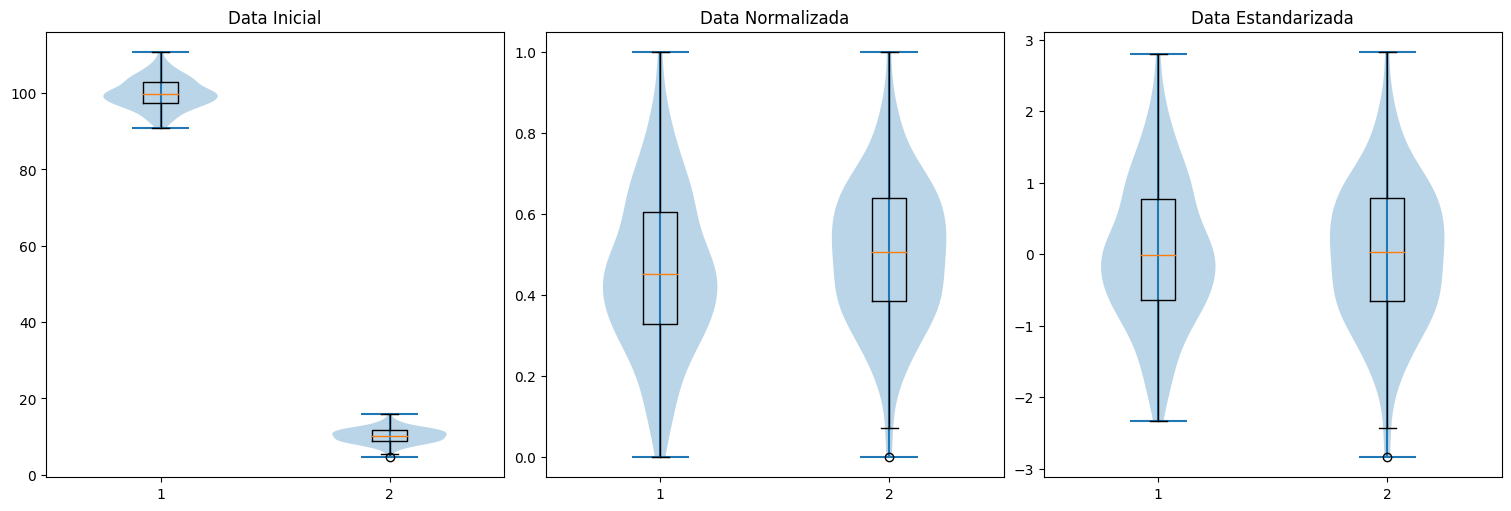

In [67]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3, figsize = (15,5),layout = "constrained")

ax[0].violinplot(df)
ax[0].boxplot(df)
ax[0].set(title="Data Inicial")
ax[1].violinplot(df_normalized)
ax[1].boxplot(df_normalized)
ax[1].set(title="Data Normalizada")
ax[2].violinplot(df_standardized)
ax[2].boxplot(df_standardized)
ax[2].set(title="Data Estandarizada")
plt.show()

#### 2.3.3. Codificación de variables categóricas (One-Hot encoding)

One-hot encoding es una técnica de procesamiento que se utiliza para convertir variables categóricas en forma númerica. Es muy útil en el aprendizaje automático, ya que muchos modelos (como la mayoría de los basados en árboles y los modelos lineales) no pueden trabajar directamente con datos de forma categórica.

##### ¿Cuándo usar One-Hot Encoding?
1. Cuando las características categóricas son nominales y no hay relación de orden entre las categórias. Si hay una relación ordinal (como alto, medio, bajo), otros métodos como el "Label Encoding" podrían se más adecuados.
2. Cuando no hay un número excesivamente grande de categorías en una variable. One-hot encoding aumenta la dimensionalidad de los datos porque agrega nuevas columnas, una para categoría única. Si una variable tiene muchas categórias, esto podría hacer que el conjunto de datos se vuelva muy grande y podría llevar a problemas de memoria y a un rendimiento más lento del modelo.

In [72]:
df_clean

,Nombre,Edad,Ciudad,Codigo Postal
0,Juan,32,Bogota,110111
1,Ana,28,Medellin,050021
2,Carlos,45,Cali,760001
3,Maria,38,Barranquilla,080002


**Ejemplo:**

In [73]:
pd.get_dummies(df_clean, columns=["Nombre"])

,Edad,Ciudad,Codigo Postal,Nombre_Ana,Nombre_Carlos,Nombre_Juan,Nombre_Maria
0,32,Bogota,110111,0,0,1,0
1,28,Medellin,050021,1,0,0,0
2,45,Cali,760001,0,1,0,0
3,38,Barranquilla,080002,0,0,0,1


**Recomendación:**
Cuando se trabaje con one-hot encoding en el contexto de un proyecto de aprendizaje automático, debe tener en en cuenta no caer en la "trampa de las variables ficticias" si el modelo no puede manejar multicolinealidad. Algunos modelos, como la regresión Lineal, requieren que se elimine una de las columnas codificadas para evitar la multicolinealidad. Otros modelos como los arboles de decisión no requieren esta consideración.

#### 2.3.4. Binarización

Es el proceso de convertir datos númericos en datos binarios (0, 1) basándose en un umbral. Es útil cuando tienes datos que quieres convertir en una característica booleana como parte de la ingeniería de características, o cuando estás trabajando con modelos de aprendizaje automático que requieren o se benefician de características binarias.

**¿Cuándo usar la binarización?**
1. Cuando se tiene una variable númerica que desee convertir en una característica categórica binaria. Por ejemplo, en lugar de tener una característica de "edad", se podría contar con una característica de "mayor de 18" que sea 1 si la edad es mayor de 18 o 0 de lo contrario.
2. Cuando estás trabjando con modelos que solo aceptan entradas binarias como lo es el caso de las máquinas de vectores de soporte, Bayes ingenuo, Arboles de decision, entre otros.
3. Cuando quieres hacer una rápida exploración de datos o generar nuevas hipótesis basadas en categorizaciones binarias de características.

**Ejemplo:**

In [ ]:
umbral = 30
df_clean["Mayor de 30"] = (df_clean["Edad"]>umbral).astype(int)
df_clean

,Nombre,Edad,Ciudad,Codigo Postal,Mayor de 30
0,Juan,32,Bogota,110111,1
1,Ana,28,Medellin,050021,0
2,Carlos,45,Cali,760001,1
3,Maria,38,Barranquilla,080002,1


#### 2.3.5. Creación de características (Feature Engineering):

El "feature engineering" (ingeniería de características) es un paso crucial en el proceso de modelado de aprendizaje automático. Se refiere al proceso de usar el conocimiento del dominio de los datos para crear características que hacen que los algoritmos de aprendizaje automático funcionen de manera más eficiente. Es beneficioso cuando:

1. **Mejoramiento del rendimiento del modelo:** Algunos algoritmos de aprendizaje automático pueden descubrir complejas relaciones no lineales si se les proporciona las características correctas. La ingeniería de características puede ayudar a resaltar estas relaciones que de otro modo no serían evidentes.

2. **Reducción de la complejidad del modelo:** Algunas veces, la generación de características puede simplificar un modelo al crear una relación lineal donde antes había una relación no lineal. Un modelo más simple es generalmente más fácil de interpretar y puede tener mejor desempeño.

3. **Uso de conocimientos expertos:** La ingeniería de características te permite inyectar conocimientos del dominio en tus datos, posiblemente haciendo más efectivos los modelos de aprendizaje automático.

**Ejemplo:**

Imagine que se tiene un conjunto de datos sobre precios de casas y se quiere predecir el precio de una casa basado en sus características. Supongamos que una de las características es la fecha de construcción de la casa. Esta fecha en sí misma puede no ser muy útil para un modelo, pero se puede convertir en una característica más útil, como la edad de la casa en el momento de la venta.

In [ ]:
import pandas as pd
from datetime import datetime

# Crear un DataFrame de ejemplo
data = {
    'fecha_construccion': ['2000-01-01', '1990-10-12', '2021-01-15'],
    'fecha_venta': ['2022-01-01', '2000-03-01', '2023-01-01'],
}
df = pd.DataFrame(data)

# Convertir las columnas de cadena a fechas
df['fecha_construccion'] = pd.to_datetime(df['fecha_construccion'])
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

# Calcular la edad de la casa en el momento de la venta
df['edad_en_venta'] = df['fecha_venta'].dt.year - df['fecha_construccion'].dt.year

df

,fecha_construccion,fecha_venta,edad_en_venta
0,2000-01-01,2022-01-01,22
1,1990-10-12,2000-03-01,10
2,2021-01-15,2023-01-01,2


La característica 'edad_en_venta' es probablemente más útil para un modelo de predicción de precios que la fecha de construcción en sí misma, ya que representa de manera más directa cómo la antigüedad de una casa podría afectar su valor.

## 3. Tratamiento de valores faltantes y Outliers

### 3.1. Valores faltantes

El tratamiento de valores faltantes es una etapa crucial en el preprocesamiento de datos, ya que la presencia de datos faltantes puede distorsionar el análisis y resultar en un modelo predictivo menos preciso.

#### 3.1.1. Identificación:

Para identificar los valores faltantes se pueden seguir algunos de los siguientes consejos:
* Uso de funciones como isnull() o notnull()

In [80]:
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [ ]:
df.notnull() != df.isnull()

,A,B,C
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True


* `info()` y `describe()` para obtener el resumen y detectar columna con valores faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [ ]:
df.describe()

,A,B,C
count,3.000000,3.000000,4.000000
mean,2.333333,6.666667,10.500000
std,1.527525,1.527525,1.290994
min,1.000000,5.000000,9.000000
25%,1.500000,6.000000,9.750000
50%,2.000000,7.000000,10.500000
75%,3.000000,7.500000,11.250000
max,4.000000,8.000000,12.000000


* Visualización con mapas de calor (heatmap) de valores faltantes para identificar patrones de ausencia.

In [84]:
import missingno as msno
import seaborn as sns

data = {'A': [1, 2, None, 4, 5, None, 7,9,6,2,np.nan,5,3,np.nan,1,6,np.nan],
        'B': [None, 2, 3, None, None, 6, 7,10,8,np.nan,5,np.nan,np.nan,12,8,5,6],
        'C': [11, None, None, 14, 15, 16, 17,18,20,21,np.nan,17,16,14,np.nan,np.nan,10]}
df = pd.DataFrame(data)
df_multi_fault = df.copy()
df

,A,B,C
0,1.0,NaN,11.0
1,2.0,2.0,NaN
2,NaN,3.0,NaN
3,4.0,NaN,14.0
4,5.0,NaN,15.0
5,NaN,6.0,16.0
6,7.0,7.0,17.0
7,9.0,10.0,18.0
8,6.0,8.0,20.0
9,2.0,NaN,21.0


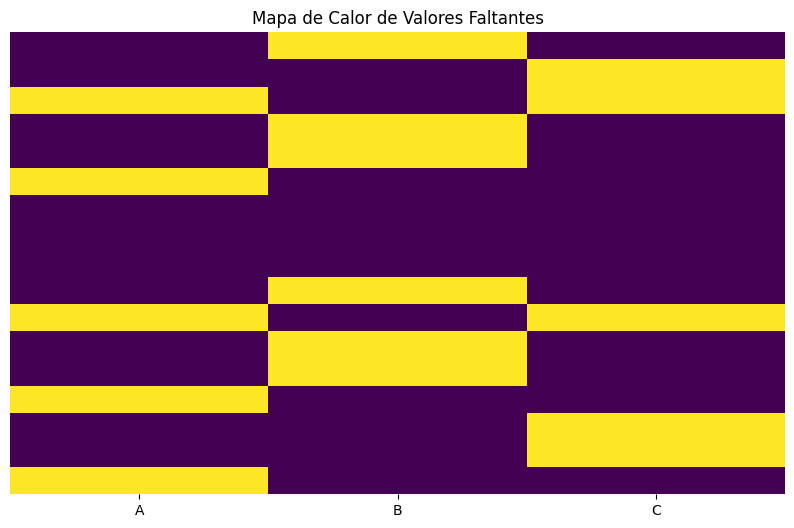

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

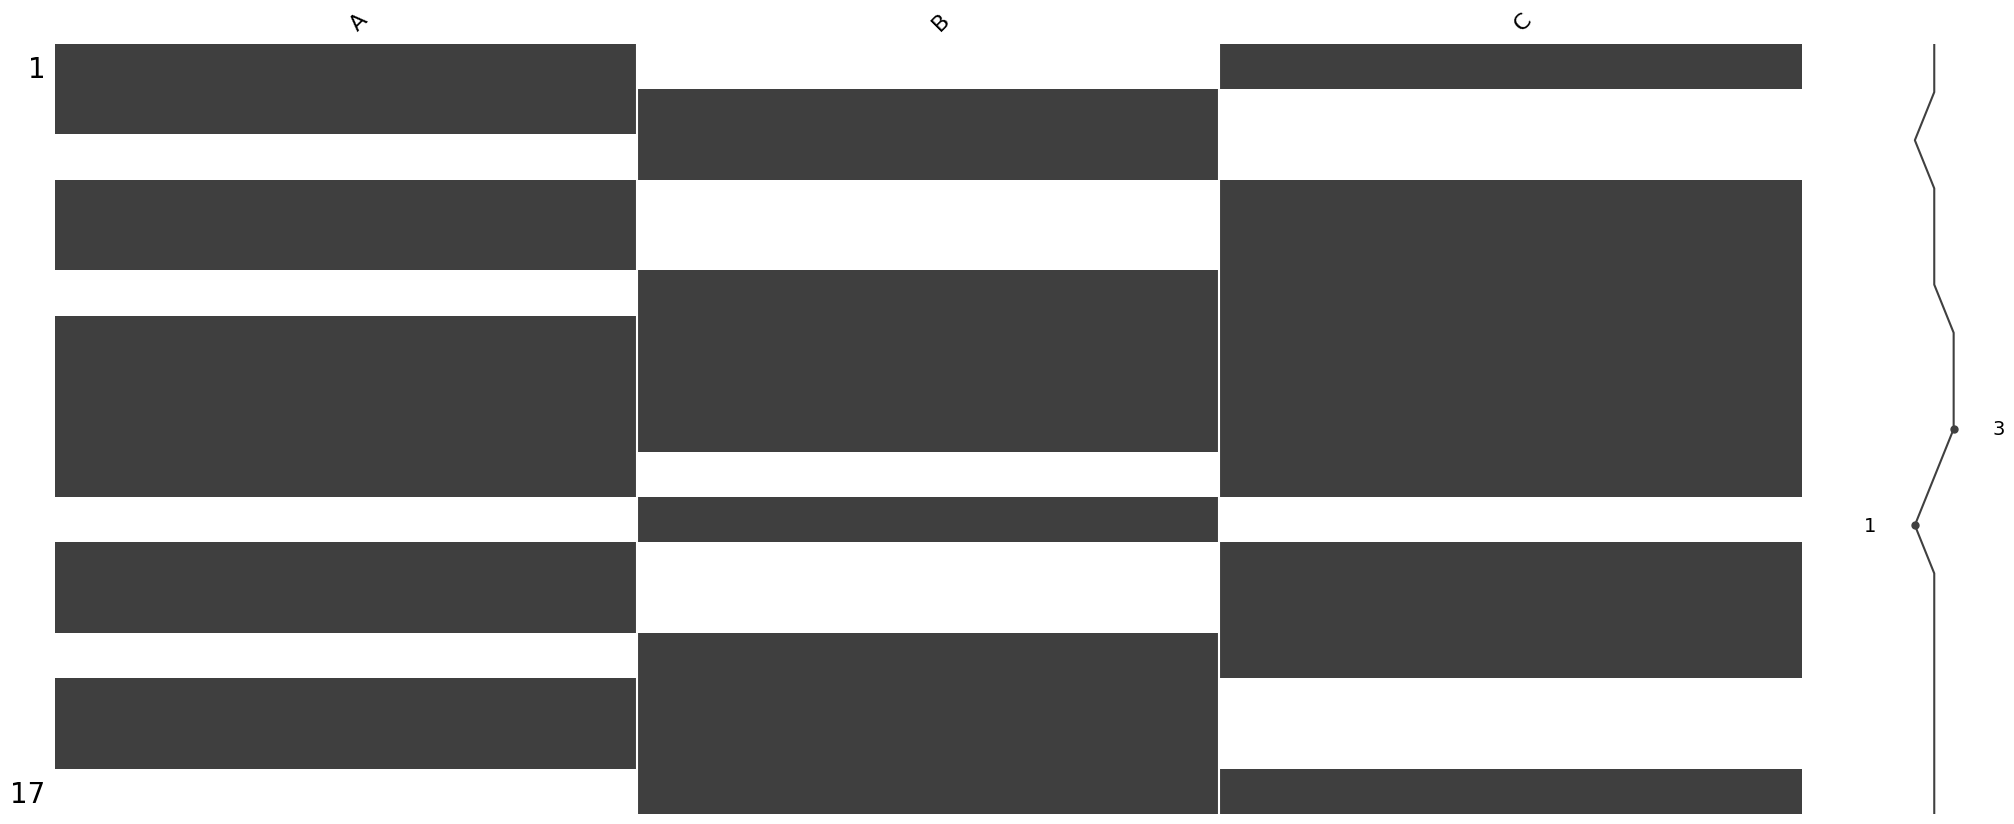

In [86]:
msno.matrix(df)
plt.show()

La biblioteca `missingno` también proporciona una manera rápida y fácil de visualizar patrones en la falta de datos. La función `msno.matrix` crea una visualización de la densidad de valores no nulos en las columnas.

Tener un mapa visual de los datos faltantes puede ayudar a decidir cómo manejarlos. Por ejemplo, si se observa que una columna tiene valores faltantes en su mayoría, podría optar por eliminarla. Si hay un patrón en los datos faltantes, esto podría sugerir un problema más amplio con los datos o una oportunidad para la ingeniería de características.

#### 3.1.2. Tratamiento:

1. **Eliminar datos:**
Una opción es eliminar las filas o columnas con los valores nulos.

In [88]:
df.dropna()

,A,B,C
6,7.0,7.0,17.0
7,9.0,10.0,18.0
8,6.0,8.0,20.0


 Esta es una solución rápida y fácil, sin embargo esta alternativa no suele ser eficiente cuando se cuenta con muy pocos datos o cuando hay muchos faltantes ya que eliminaría toda la fila o columna lo que puede hacer que se pierda infromación valiosa.

 Adicionalmente, se debe tener en cuenta la posibilidad de que el mecanismo por el cual se recopile la información admita valores faltantes o que estos valores también tengan un significado dentro del problema.

2. **Imputación:** Otra opción es reemplazar los valores faltantes con otro valor, colo la media, la mediana o la moda de los datos, Es importante considerar el tipo de variable (numérica o categórica) y la naturaleza de los datos. La media es sensible a los outliears, mientras que la mediana es más robusta. la moda se utiliza para variables categóricas.

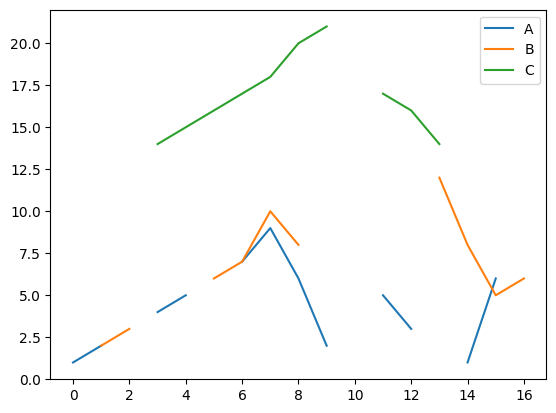

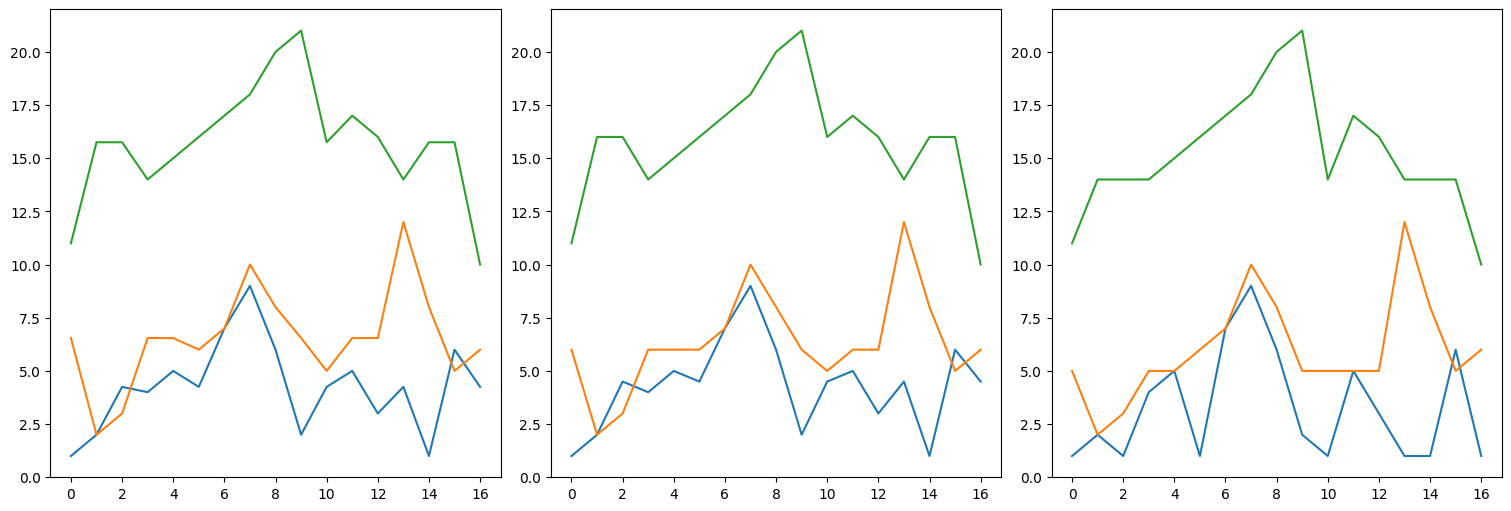

In [89]:
df.plot()
fig,ax = plt.subplots(1,3,figsize=(15,5), layout = "constrained")
ax[0].plot(df.fillna(df.mean()))
ax[1].plot(df.fillna(df.median()))
ax[2].plot(df.fillna(df.mode().iloc[0]))
plt.show()

La imputación preserva más los datos, pero puede introducir sesgos si los valores faltantes no son aleatorios.

3. **Imputación avanzada:**

Las técnicas de imputación avanzada se utilizan para manejar valores faltantes en conjuntos de datos, especialmente cuando los datos perdidos son sustanciales y no se pueden descartar sin perder información crítica. Estas técnicas suelen ser preferibles sobre métodos más simples como la imputación por la media o la mediana, ya que pueden preservar la estructura de los datos, como las relaciones entre variables. Aquí se presentan algunas técnicas de imputación avanzada y sus usos típicos:



* **Imputación Múltiple por Ecuaciones Encadenadas (MICE):**
    - **Descripción:** MICE es un enfoque versátil que maneja valores faltantes mediante un proceso iterativo. En cada iteración, MICE imputa los datos faltantes en una variable utilizando el resto de variables como predictores, en un proceso conocido como "imputación encadenada".
    - **Cuándo usar:** MICE es útil cuando los datos están faltando al azar (MAR, por sus siglas en inglés) y el conjunto de datos contiene múltiples variables predictivas que se pueden usar para imputar los valores faltantes.


In [94]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]}
df_original = pd.DataFrame(data)
df = df_original.copy()
# Aplicar MICE
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df["A_mice"] = df_imputed["A"].round(0)
df["B_mice"] = df_imputed["B"].round(0)
df


,A,B,A_mice,B_mice
0,1.0,5.0,1.0,5.0
1,2.0,NaN,2.0,6.0
2,NaN,7.0,3.0,7.0
3,4.0,8.0,4.0,8.0


* **Imputación K-Vecinos más Cercanos (KNN):**
    - **Descripción:** La imputación KNN utiliza los k vecinos más cercanos (basándose en alguna medida de distancia, como la distancia euclidiana) para estimar el valor faltante. No asume ninguna distribución para los datos y puede ser más preciso que la imputación por la media o la mediana.
    - **Cuándo usar:** KNN es beneficioso cuando hay relaciones no lineales en los datos, ya que la técnica no asume ninguna forma específica de relación entre las características.

In [96]:
from sklearn.impute import KNNImputer


# Aplicar imputación KNN
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df_original), columns=df_original.columns)
df["A_knn"] = df_imputed["A"].round(0)
df["B_knn"] = df_imputed["B"].round(0)
df

,A,B,A_mice,B_mice,A_knn,B_knn
0,1.0,5.0,1.0,5.0,1.0,5.0
1,2.0,NaN,2.0,6.0,2.0,6.0
2,NaN,7.0,3.0,7.0,2.0,7.0
3,4.0,8.0,4.0,8.0,4.0,8.0



* **Imputación por Modelo Predictivo:**
    - **Descripción:** Este método implica la construcción de un modelo predictivo (como regresión, árboles de decisión o redes neuronales) para estimar valores que faltan basados en otras variables correlacionadas.
    - **Cuándo usar:** Es útil cuando las relaciones entre variables son complejas y se pueden capturar mejor a través de modelos de aprendizaje automático.
* **Imputación con Deep Learning (Redes Neuronales):**
    - **Descripción:** Las técnicas de Deep Learning, como las Redes Neuronales, pueden modelar relaciones complejas y no lineales en los datos y se pueden utilizar para la imputación.
    - **Cuándo usar:** Esta técnica es adecuada cuando se tienen grandes volúmenes de datos y las relaciones entre variables son demasiado complejas para métodos tradicionales.
* **Imputación de Series Temporales:**
    - **Descripción:** Métodos específicos para series temporales, como la interpolación lineal o más compleja (como la interpolación polinómica o spline), o modelos ARIMA para imputar valores faltantes en datos ordenados temporalmente.
    - **Cuándo usar:** Estos métodos son apropiados cuando los datos se presentan en secuencias temporales y se espera una coherencia o tendencia a lo largo del tiempo.
* **Algoritmos basados en Expectation-Maximization (EM):**
    - **Descripción:** EM es un procedimiento iterativo que intenta estimar los valores faltantes maximizando la verosimilitud de los datos observados, bajo ciertas suposiciones estadísticas.
    - **Cuándo usar:** EM se utiliza cuando se pueden hacer suposiciones sobre la distribución estadística de los datos, y los datos faltantes son MAR o completamente al azar (MCAR).
* **Imputación Generativa Adversarial (GANs):**
    - **Descripción:** Las GANs pueden generar datos que son estadísticamente similares a los datos reales y pueden utilizarse para generar imputaciones para valores faltantes.
    - **Cuándo usar:** GANs son útiles cuando se necesitan generar datos realistas en contextos donde los datos son altamente complejos y multidimensionales, como imágenes o secuencias de texto.

Al elegir un método de imputación, es crucial considerar el contexto de los datos, el mecanismo de datos faltantes, la cantidad de datos faltantes, la capacidad computacional disponible y, lo más importante, cómo el método de imputación podría afectar los resultados del análisis. Además, siempre es una buena práctica validar el rendimiento de la imputación comparando los resultados de diferentes métodos y considerando la interpretación y la aplicabilidad en el contexto de tu problema específico.

##### Recomendaciones
No existe una regla única y universalmente aceptada como la proporción de Pareto para determinar cuándo imputar o eliminar datos en base a un porcentaje específico de valores faltantes. Sin embargo, hay algunas directrices generales que los científicos de datos tienden a seguir, aunque la decisión a menudo depende del contexto específico del análisis, del conjunto de datos en cuestión y de los objetivos del proyecto.

Aquí hay algunos puntos a considerar:

1. Bajo porcentaje de datos faltantes (digamos, menos del 5%): Si solo un pequeño número de valores está perdido, puede ser aceptable imputar esos valores faltantes utilizando técnicas como la imputación media, mediana o moda, o métodos más avanzados como MICE o KNN, dependiendo de la naturaleza de tus datos.

2. Porcentaje moderado de datos faltantes (entre el 5% y el 30%): Con un porcentaje más significativo de datos faltantes, es esencial investigar y entender por qué faltan los datos. Si los datos no están completamente perdidos al azar, la imputación puede introducir sesgos significativos. En estos casos, es posible que desees utilizar técnicas de imputación más avanzadas o modelos que manejen adecuadamente los datos faltantes.

3. Alto porcentaje de datos faltantes (más del 30%): Cuando una gran proporción de tus datos está perdida, debes ser extremadamente cauteloso. La eliminación de estas filas/columnas podría resultar en una pérdida significativa de información. La imputación de tantos datos faltantes puede distorsionar completamente tus resultados debido a la gran cantidad de suposiciones que se estarían haciendo. En este escenario, es esencial entender por qué faltan tantos datos y considerar si los datos restantes son suficientemente representativos sin las observaciones faltantes.

En cualquier caso, es crucial realizar un análisis exploratorio de datos para entender la naturaleza y el mecanismo de los datos faltantes. Además, si decides proceder con la imputación, es recomendable realizar un análisis de sensibilidad para entender cómo la imputación podría afectar tus resultados.

Finalmente, en lugar de adherirse estrictamente a los porcentajes, la decisión de imputar o eliminar debe basarse en una comprensión profunda del conjunto de datos, del contexto del problema y de las implicaciones de perder cierta información. También es vital validar los métodos de imputación utilizando técnicas de validación cruzada o conjuntos de datos de simulación para asegurarse de que cualquier método que elijas no degrade la calidad de tu modelo o análisis.

### 3.2. Outliers (Valores Atípicos)

Los "outliders" son valores en el conjunto de datos que se desvían significativamente de los demás. Pueden ser causados por variabilidad en la medición, errores de entrada de datos, o pueden ser válidos pero extremadamente raros

#### 3.2.1. Identificación

##### 3.2.1.1 Análisis visual

Se pueden identificar los outliers a través de herramientas gráficas tales como box plots, scatter plots e histogramas de frecuencia.

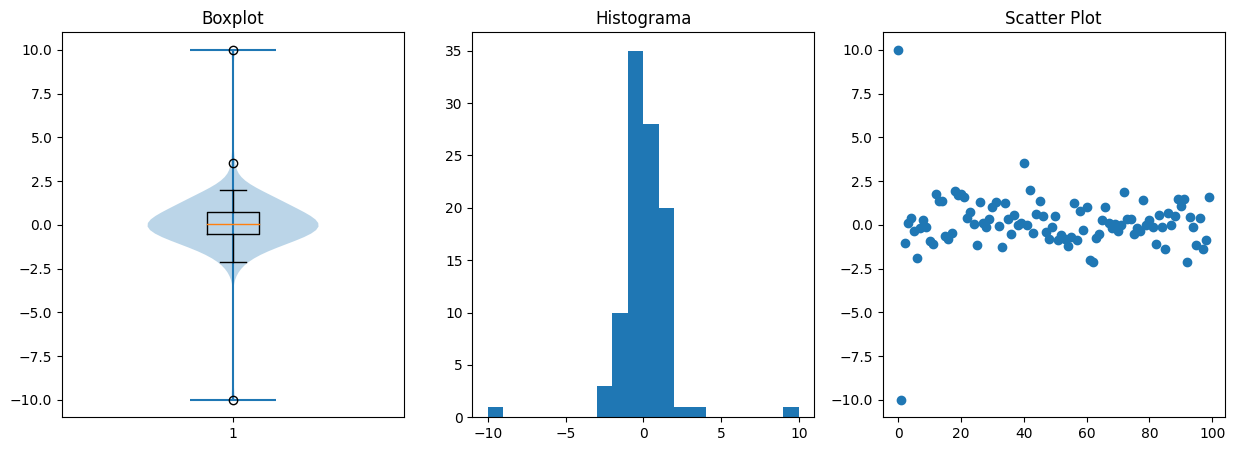

In [99]:

df = pd.DataFrame({'val': np.random.normal(0,1,100)})
df.iloc[0] = 10
df.iloc[1] = -10

# fig, ax = plt.subplots(1,3,figsize = (15,5) ,layout = "constrained")
def plot_dist(df):
    # Boxplot
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.violinplot(df["val"])
    plt.boxplot(df['val'])
    plt.title('Boxplot')

    # Histograma
    plt.subplot(132)
    plt.hist(df['val'], bins=20)
    plt.title('Histograma')

    # Scatter plot
    plt.subplot(133)
    plt.scatter(range(len(df['val'])), df['val'])
    plt.title('Scatter Plot')
    plt.show()
plot_dist(df)

##### 3.2.1.2. Estadísticas descriptivas

Se pueden identificar outliers utilizando dos estrategias distintas
* Z-score: Hace referencia al número de desviaciones estándar que un valor está lejos de la media. Un valor absoluto de z-score mayor de 3 es comúnmente considerado un outlier. de forma manual el z-score se halla para cada punto de la siguiente manera:
$$
z = \frac{X-\mu}{\sigma}
$$

In [104]:
df["Z_score"]=(df["val"]-df["val"].mean())/df["val"].std()
df[abs(df["Z_score"])>3]


,val,Z_score
0,10.0,5.655909
1,-10.0,-5.790280


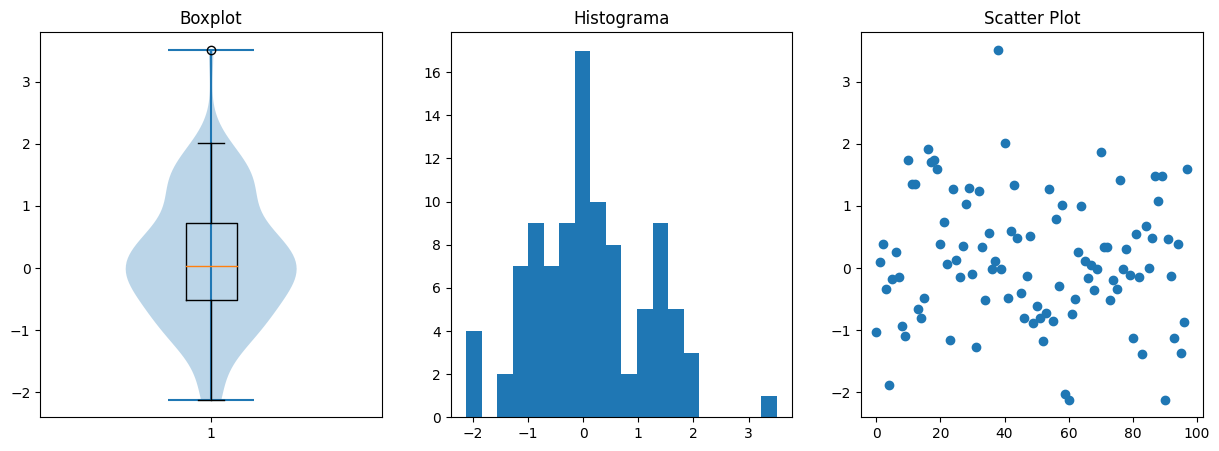

In [102]:
plot_dist(df[abs(df["Z_score"])<3])

* IQR (Rango Intercuartilico): Es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que se encuentran fuera del rango [Q1-1.5\*IQR , Q3 + 1.5\*IQR] son considerados outliders

In [105]:
Q1 = df["val"].quantile(0.25)
Q3 = df["val"].quantile(0.75)

IQR = Q3-Q1

outliers = df[(df['val'] < (Q1-1.5*IQR))|(df['val'] > (Q3+1.5*IQR))]
outliers

,val,Z_score
0,10.00000,5.655909
1,-10.00000,-5.790280
40,3.51425,1.944053


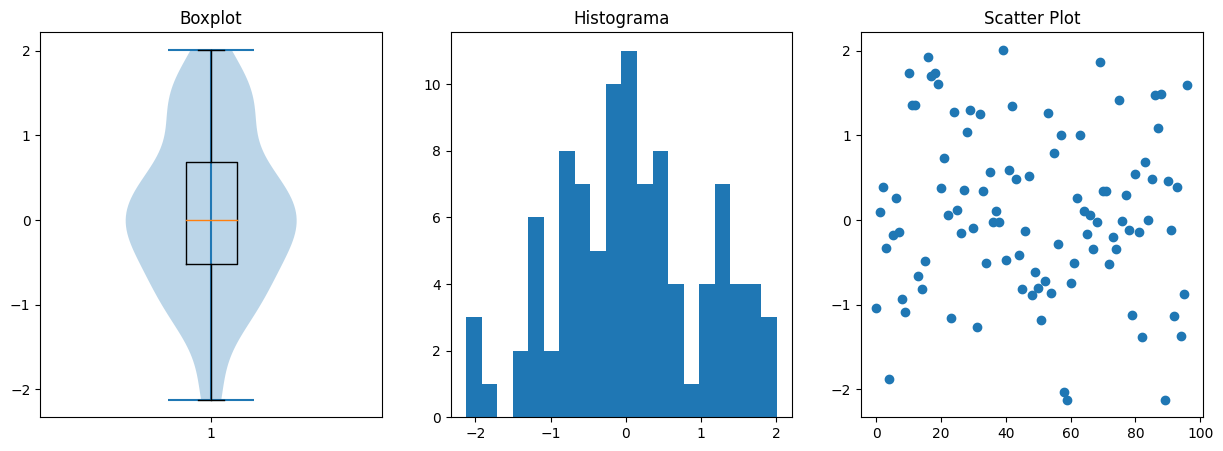

In [106]:
plot_dist(df[(df['val'] >= (Q1-1.5*IQR))&(df['val'] <= (Q3+1.5*IQR))])

##### 3.2.1.3. Metodos de agrupamiento
DBSCAN HDBSCAN

#### 3.2.2. Tratamiento

El tratamiento de outliers es una parte fundamental del preprocesamiento de datos, especialmente en el análisis estadístico y de modelos de aprendizaje automático, ya que los outliers pueden distorsionar los resultados. Entre los métodos más frecuentes se encuentran:


##### 3.2.2.1. Capado

Si se sabe que los outliers son errores de medición o datos que no son posibles (por ejemplo, una persona con 200 años en una encuesta), se podría intentar limitar el valor a un cierto "límite sensato".

In [108]:
df_clean["Edad"][3]=380
df_clean

<ipython-input-108-4503ae69b682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Edad"][3]=380


,Nombre,Edad,Ciudad,Codigo Postal
0,Juan,32,Bogota,110111
1,Ana,28,Medellin,050021
2,Carlos,45,Cali,760001
3,Maria,380,Barranquilla,080002


In [110]:
upper_bound = np.percentile(df_clean["Edad"], 75)
lower_bound = np.percentile(df_clean["Edad"], 25)

df_capped = df_clean.copy()
df_capped["Edad"] =np.clip(df_clean["Edad"], lower_bound, upper_bound)
df_capped

,Nombre,Edad,Ciudad,Codigo Postal
0,Juan,32.00,Bogota,110111
1,Ana,31.00,Medellin,050021
2,Carlos,45.00,Cali,760001
3,Maria,128.75,Barranquilla,080002


In [112]:
data = np.array([30,40,50,20,17,20,19,22,36,35,19,21,360])
df = pd.DataFrame(data)
upper_bound = np.percentile(df, 75)
lower_bound = np.percentile(df, 25)

display(upper_bound, lower_bound)

df_cap = np.clip(df, lower_bound, upper_bound)
df_cap

36.0

20.0

,0
0,30
1,36
2,36
3,20
4,20
5,20
6,20
7,22
8,36
9,35


##### 3.2.2.2. Transformación
Las transformaciónes de datos son técnicas utilizada para modificar la distribución de tus datos, haciéndolos más "normales" (gaussianos) y, por lo tanto, más manejables para ciertos tipos de análisis y modelado estadístico. Aquí tienes ejemplos de cómo realizar transformaciones logarítmicas, raíz cuadradasy box-cox

Text(0.5, 1.0, 'box-cox $\\lambda$=-0.29')

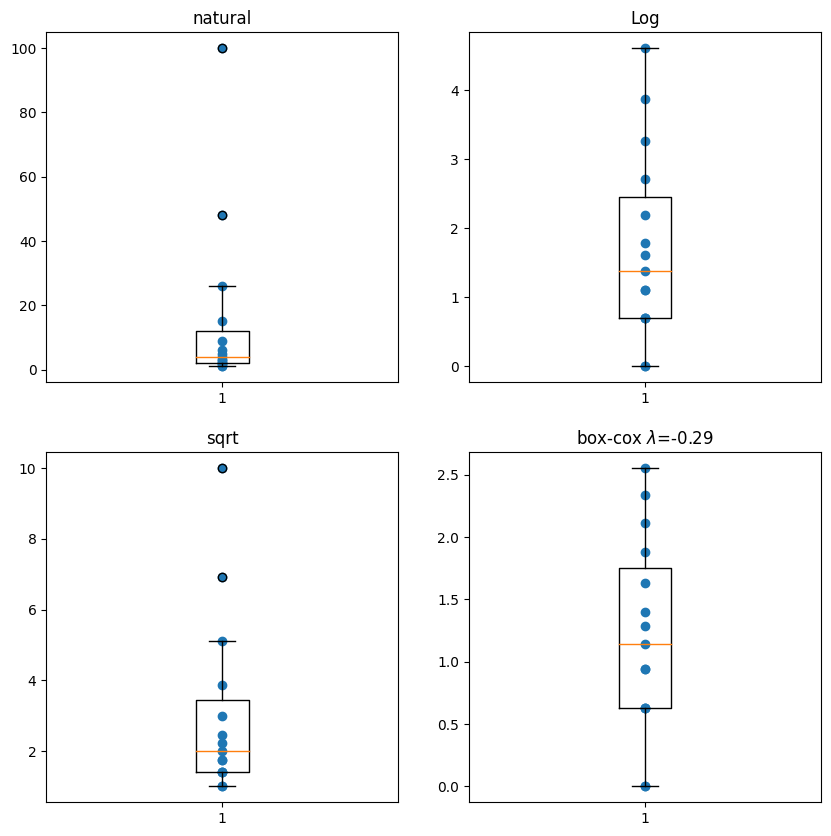

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = np.array([2,1,2,1,4,3,2,3,5,6,9,15,26,48,100])
df = pd.DataFrame(data)
data_log_transformed = np.log(df)
data_sqrt_transformed = np.sqrt(df)
data_boxcox_transformed, lambda_param = stats.boxcox(data)

plt.figure(figsize = (10,10))
plt.tight_layout()
plt.subplot(221)
# plt.violinplot(df)
plt.boxplot(df)
plt.scatter(np.ones(len(df)),df)
plt.title("natural")
plt.subplot(222)
# plt.violinplot(data_log_transformed)
plt.boxplot(data_log_transformed)
plt.scatter(np.ones(len(data_log_transformed)),data_log_transformed)

plt.title("Log")
plt.subplot(223)
# plt.violinplot(data_sqrt_transformed)
plt.boxplot(data_sqrt_transformed)
plt.scatter(np.ones(len(data_sqrt_transformed)),data_sqrt_transformed)

plt.title("sqrt")
plt.subplot(224)
# plt.violinplot(data_boxcox_transformed)
plt.boxplot(data_boxcox_transformed)
plt.scatter(np.ones(len(data_boxcox_transformed)),data_boxcox_transformed)

plt.title(f"box-cox $\lambda$={lambda_param:.2f}")




Para el caso de la transformación Box-Cox es una forma de transformar datos no normales en un conjunto de datos normal. La normalidad es una asunción importante en muchos modelos estadísticos, y si los datos no siguen una distribución normal, puede distorsionar los resultados y las conclusiones de estos modelos. La transformación de Box-Cox puede hacer que los procedimientos estadísiticos que dependen de la normalidad sean más robustos.
Se define como:

$$
T(y) = \begin{cases}\frac{y^\lambda-1}{\lambda}\quad \text{si } \lambda \ne 0 \\ \log(y) \quad \text{si } \lambda = 0\end{cases}
$$

donde:

* $T(y)$ es el dato transformado.
* $y$ es el dato original (y >0, todos los datos debe ser positivos).
* $\lambda$ es el parámetro de transformación.

El objetivo de la transformación es identificar el valor de $\lambda$ que maximiza la normalidad de los datos. Cuando $\lambda = 0$, la transformación Box-Cox corresponde a una trasformación logaritmica. Diferentes valores de $\lambda$ proporcionan diferentes transformaciones: por ejemplo, $\lambda = 0.5$ corresponde a una transformación de raíz cuadrada y $\lambda = -1$  corresponde a una transformación reciproca.

La selección de $\lambda$ generalmente se realiza mediante un proceso que busca el valor que maximizará la verosimilitud de los datos transformados siendo normales. La distribución de los datos transformados se compara con la distribución normal a través de la función de verosimilitud, y el valor de $\lambda$ que da la "mejor" correspondencia es seleccionado.

Lambda óptimo: 0.2914008823352608


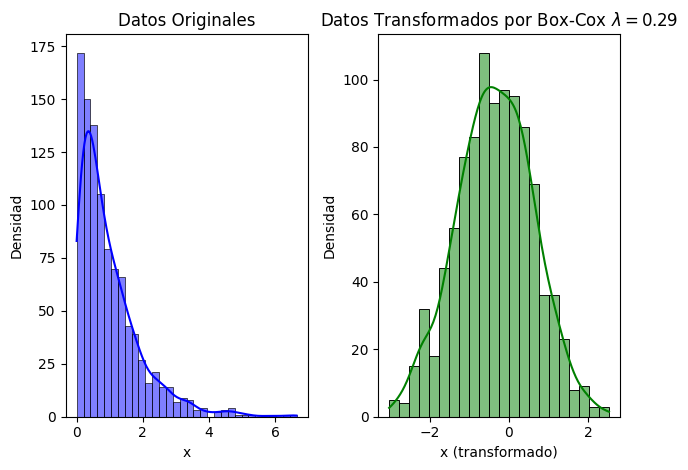

In [115]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generar algunos datos no normales
data = np.random.exponential(size=1000)

# Transformación de Box-Cox
transformed_data, lambda_param = stats.boxcox(data)

print(f"Lambda óptimo: {lambda_param}")

# Graficar los datos originales y los datos transformados
fig, ax = plt.subplots(1, 2)

# Datos originales
sns.histplot(data, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Datos Originales")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Densidad")

# Datos transformados
sns.histplot(transformed_data, kde=True, ax=ax[1], color='green')
ax[1].set_title(f"Datos Transformados por Box-Cox $\lambda = {lambda_param:.2f}$")
ax[1].set_xlabel("x (transformado)")
ax[1].set_ylabel("Densidad")

plt.tight_layout()
plt.show()


Cada una de las transformaciones tienen un efecto diferente en la distribución de tus datos, pero todas tienen a hacer la distribución más normal y reducir el impacto de los outliers.
* La **transformación logarítmica:** funciona bien para datos que están sesgados a la derecha y tienen valores positivos.
* La **transformación de raíz cuadrada:** es una técnica moderada que es útil cuando tus datos están moderamente sesgados y tienen valores cero o positivos.
* La **transformación Box-Cox:** requiere que los datos sean positivos y encuentra un lambda que maxmiza la normalidad de los datos. Es bastante flexible y puede manejar diversas distribuciones.

### ANEXO WEBSCRAP

In [116]:
import requests
from bs4 import BeautifulSoup

url = "https://es.wikipedia.org/wiki/Anexo:Hombres_m%C3%A1s_ancianos"

# Realizar la solicitud a la página web
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Buscar la tabla en el HTML
tabla = soup.find('table', {'class': 'wikitable'})

# Obtener los encabezados de la tabla
encabezados = []
for th in tabla.find_all("th"):
    encabezados.append(th.text.strip())

# Recorrer las filas de la tabla y obtener la información
filas = tabla.find_all("tr")
i = 0
df_edades = pd.DataFrame()
for fila in filas[1:]:  # Ignorar la fila de encabezado
    i +=1
    datos = fila.find_all("td")
    datos_fila = [c.text.strip() for c in fila.find_all("th")]

    [datos_fila.append(td.text.strip()) for td in datos]
    df_edades[i] = (dict(zip(encabezados, datos_fila)))
df_edad = df_edades.transpose()
edad_max = int(df_edad.iloc[0]["Edad alcanzada"].split(" ")[0])


,N.º,Nombre[2]​,Nacimiento,Fallecimiento,Edad alcanzada,País
1,1,Jirōemon Kimura,01897-04-19 19 de abril de 1897,02013-06-12 12 de junio de 2013,116 años y 54 días,Japón Japón
2,2,Christian Mortensen,01882-08-16 16 de agosto de 1882,01998-04-25 25 de abril de 1998,115 años y 252 días,Estados Unidos[3]​
3,3,Emiliano Mercado del Toro,01891-08-21 21 de agosto de 1891,02007-01-24 24 de enero de 2007,115 años y 156 días,Puerto Rico Puerto Rico[4]​
4,4,Walter Breuning,01896-09-21 21 de septiembre de 1896,02011-04-14 14 de abril de 2011,114 años y 205 días,Estados Unidos
5,5,Yukichi Chuganji,01889-03-23 23 de marzo de 1889,02003-09-28 28 de septiembre de 2003,114 años y 189 días,Japón Japón
...,...,...,...,...,...,...
96,96,Jan Goossenaerts,01900-10-30 30 de octubre de 1900,02012-03-21 21 de marzo de 2012,111 años y 143 días,Bélgica Bélgica
97,97,Jerzy Pajączkowski-Dydyński,01894-07-19 19 de julio de 1894,02005-12-06 6 de diciembre de 2005,111 años y 140 días,Reino Unido Reino Unido[17]​
98,98,Harold Bracher,01904-11-30 30 de noviembre de 1904,02016-04-13 13 de abril de 2016,111 años y 135 días,NaN
99,99,Garland Adair,01898-07-30 30 de julio de 1898,02009-12-11 11 de diciembre de 2009,111 años y 134 días,Estados Unidos


### ANEXO NLTK

In [53]:
import nltk
from nltk.corpus import wordnet

#nltk.download('wordnet')

def obtener_sinonimos(word):
    sinonimos = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            sinonimos.add(lemma.name())
    return sinonimos

palabra = "USA"
print(obtener_sinonimos(palabra))

{'US_Army', 'America', 'U._S._Army', 'Army', 'US', 'United_States_of_America', 'U.S.', 'USA', 'the_States', 'U.S.A.', 'United_States_Army', 'United_States'}
